## Practical task 8 - *SVM*

In [1]:
import pandas as pd
import numpy as np

#### 1. Loading the train and test sets

In [2]:
train=pd.read_csv('data/synth_train.csv',header=None)
test=pd.read_csv('data/synth_test.csv',header=None)

In [3]:
len(train),len(test)

(200, 200)

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pylab as pl

In [5]:
def learn_stat(train_data, train_labels, test_data, test_labels, kernel, C):    
    clf=SVC(kernel=kernel,C=C)
    clf.fit(train_data, train_labels)
    train_score=accuracy_score(train_labels,clf.predict(train_data))
    test_score=accuracy_score(test_labels,clf.predict(test_data))
    support=np.sum(clf.n_support_)
    return train_score,test_score,support

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import tools 

#### 2. plot_stat analysis

In [7]:
def plot_stat(train_data, train_labels, test_data, test_labels, kernel, minC, maxC, steps):
    c_values=np.logspace(minC,maxC,steps)
    total_train=[]
    total_test=[]
    total_support=[]
    for c in c_values:
        train_score,test_score,support=learn_stat(train_data, train_labels, test_data, test_labels, kernel,c)
        total_train.append(train_score)
        total_test.append(test_score)
        total_support.append(support) 
    f, (ax1, ax2,ax3) = plt.subplots(ncols=3,nrows=1)
    ax1.plot(c_values,total_train,c='b')
    ax1.set_xscale('log')
    ax1.set_title('Train accuracy')
    ax2.plot(c_values,total_test,c='r')
    ax2.set_xscale('log')
    ax2.set_title('Test accuracy')
    ax3.plot(c_values,total_support,c='g')
    ax3.set_xscale('log')
    ax3.set_title('Support vectors')
    f.tight_layout()
    plt.show()
    

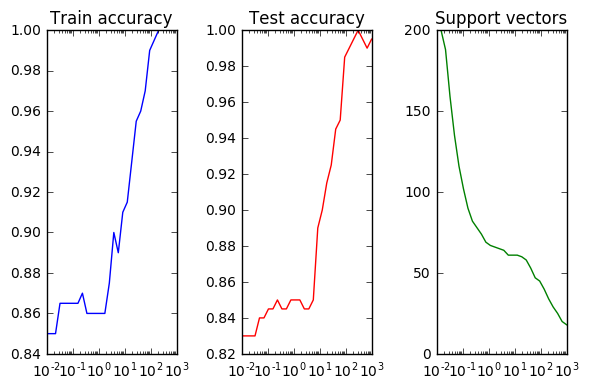

In [8]:
plot_stat(train[[1,2]],train[0],test[[1,2]],test[0],'rbf',-2,3,30)

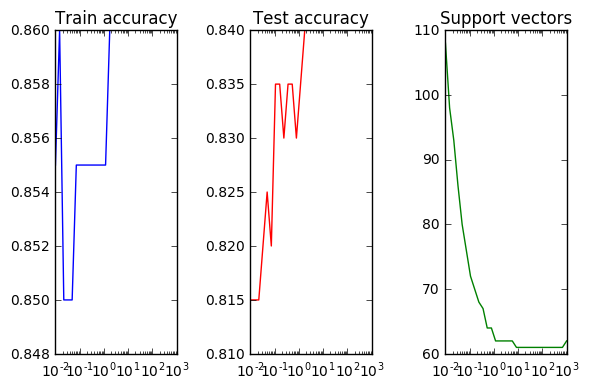

In [9]:
plot_stat(train[[1,2]],train[0],test[[1,2]],test[0],'linear',-2,3,30)

COMMON: 
There is a significant accuracy improvement as C jumps above 1. Since C is a penalty parameter C of the error term the model tends to get more selective about support vectors in order to reduce error. Accordingly, the number of support vectors decreases althuogh the model tends to overfit.
 

DISTINCT: Linear kernel - based classifier accuracy a step-shaped beacuse the its boundary is not as flexible as RBF and a minor displacement of dicision boundary can strongly affect the overall result 

There is connection between train and test accuracies because datasets have equal sizes and are quite similar as we would be able to see on the plot below

One can use the train accuracy to find the optimal value of C. In our case it is around $10^{2}$
Another way of finding the optimal value of C without access to test set is cross-validation

#### 3. plot_support analysis

In [10]:
def plot_support(train_data, train_labels, test_data, test_labels, kernel, C):
   
    svc = SVC(kernel=kernel, C=C).fit(train_data, train_labels)
    #print(svc.dual_coef_ )
    s=30
    train_data=np.array(train_data)
    test_data=np.array(test_data)
    
    train0 = train_data[np.where( train_labels == 0)]
    train1 = train_data[np.where( train_labels == 1)]
    
    test0 = test_data[np.where( test_labels == 0)]
    test1 = test_data[np.where( test_labels == 1)]

    plt.figure()
    plt.clf()
    
    plt.scatter(train0[:, 0], train0[:, 1], marker='o', c='b',s=s, zorder=10, cmap=pl.cm.Paired,label='train 0')
    plt.scatter(train1[:, 0], train1[:, 1], marker='o', c='w',s=s, zorder=10, cmap=pl.cm.Paired,label='train 1')
     
    pl.scatter(test0[:, 0], test0[:, 1], marker='*', c='b',s=s, zorder=10, cmap=pl.cm.Paired,label='test 0')
    pl.scatter(test1[:, 0], test1[:, 1], marker='*', c='w',s=s, zorder=10, cmap=pl.cm.Paired,label='test 1')
    
    
    support1=train_data[svc.support_][np.where(train_labels[svc.support_]==1)]
    support0=train_data[svc.support_][np.where(train_labels[svc.support_]==0)]
    
    pl.scatter(support1[:, 0], support1[:, 1], s=80, facecolors='none', zorder=10,label='support 1')
    pl.scatter(support0[:, 0], support0[:, 1], s=80, marker='s',facecolors='none', zorder=10,label='support 0')
    
    #plt.legend([train0_,train1_], ["Attr A", "Attr A+B"])
    
    pl.axis('tight')
    x_min = train_data[:, 0].min()
    x_max = train_data[:, 0].max()
    y_min = train_data[:, 1].min()
    y_max = train_data[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    pl.pcolormesh(XX, YY, Z > 0, cmap='Pastel2')
    pl.contour(XX, YY, Z, colors=['0.3', 'k', '0.3'],
              linestyles=['--', '-', '--'],
              levels=[-1, 0, 1])
    #pl.title(title)
    pl.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    pl.show()
    
    

#### RBF, inadequately small C

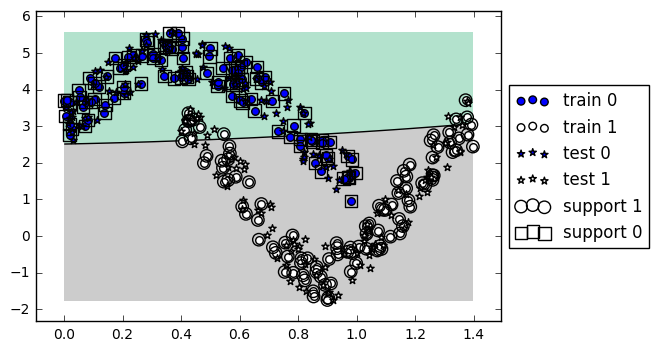

In [11]:
plot_support(train[[1,2]],train[0],test[[1,2]],test[0],'rbf',0.000001)

#### Linear, inadequately small C

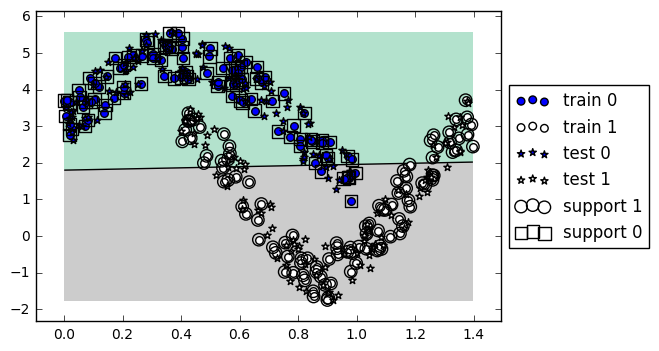

In [12]:
plot_support(train[[1,2]],train[0],test[[1,2]],test[0],'linear',0.000001)

C parameter is to define the cost of misclassifying each object. 
Low C tells the optimization to choose a  separating hyperplane with a larger margin, regardless of misclassified objects (the penalty for those is too small). 
Accordingly, more objects tend to get into the margin area. Particularly in this example we have chosen such C that the margin is so big that for both kernels all objects of the trainnig set turned out to be support ones


#### RBF, inadequately huge C

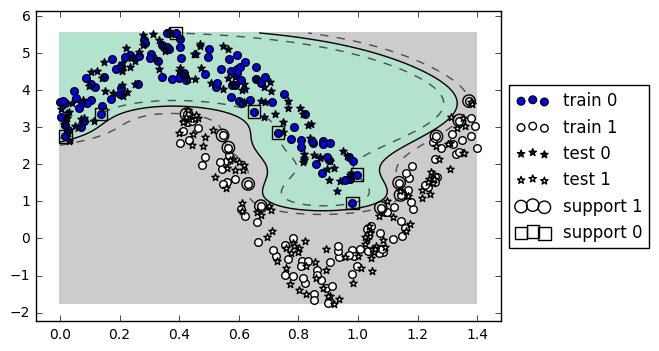

In [13]:
plot_support(train[[1,2]],train[0],test[[1,2]],test[0],'rbf',10000000)

This model is very accurate yet quite overfitted since there are very few of support vectors because of the high C

#### Linear, inadequately huge C

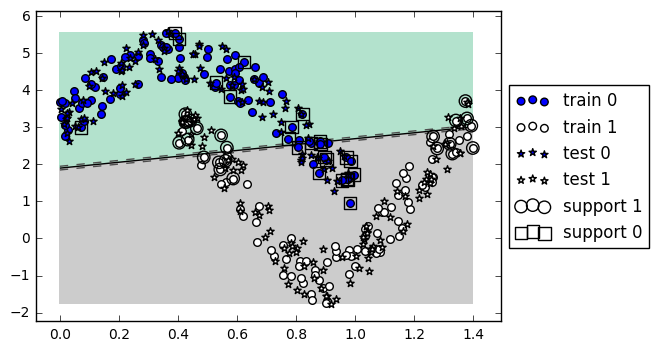

In [14]:
plot_support(train[[1,2]],train[0],test[[1,2]],test[0],'linear',10000000)

The margin is really narrow because of high C. The number of support vectors decreased significantly. They are quite distant from the margin area because this is a soft-margin classification (C>0). And duw to this we can obtain a solution for this linear unseparable dataset (with C=0 linearly unseparable datasets have no solution with SVM)

#### RBF, optimal C

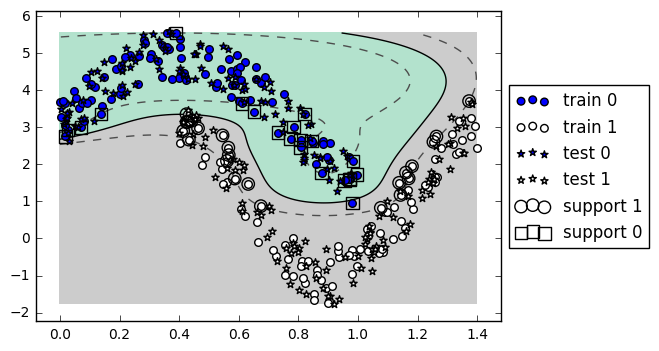

In [15]:
plot_support(train[[1,2]],train[0],test[[1,2]],test[0],'rbf',100)

This is an optimal solution. Regardless of some minor misclassification this model is more reliable than one with higher C

#### Linear, optimal C

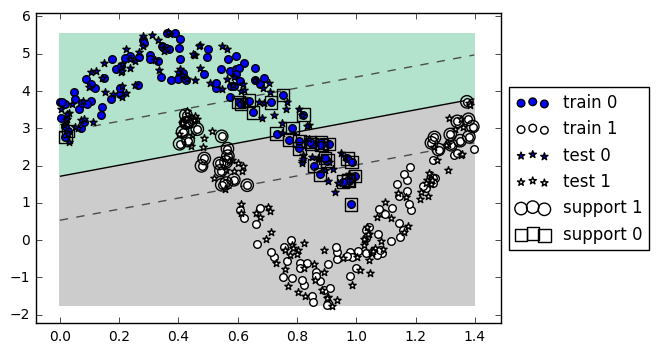

In [16]:
plot_support(train[[1,2]],train[0],test[[1,2]],test[0],'linear',100)

Linear kernel did its best to choose an optimal margin

### Implementing kernel for strings

In [17]:
french=pd.read_csv('data/fr.txt',sep='\n',header=None) 
english=pd.read_csv('data/en.txt',sep='\n',header=None) 

In [18]:
french =french[150:900]
english =english[150:900]

In [19]:
df=pd.DataFrame()
df['word']=list(french[0])+list(english[0])
df['label']=[1 for i in range(len(french))]+[0 for i in range(len(english))]

In [30]:
from Levenshtein import distance

#### Custom Levenshtein distance-based exponential kernel 

In [31]:
def string_kernel(U,V):
    print(len(U), U.shape[0])
    m = np.zeros([len(U),len(V)])
    for i in range(len(U)):
        for j in range(len(V)):
            m[i][j] = np.exp(-0.01*(distance(df.loc[int(U[i][0])]['word'],df.loc[int(V[j][0])]['word'])))
    
    return m

In [32]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

Some routine to replace string objects with corresponding indices

In [33]:
RND_SEED=42
train,test = train_test_split(df,train_size=0.6,random_state=RND_SEED)
X_train = np.reshape(train.index,[-1,1])
y_train = train['label']
X_test = np.reshape(test.index,[-1,1])
y_test = test['label']
df.loc[X_train[0][0]]

word     pr
label     1
Name: 602, dtype: object

In [34]:
clf = SVC(kernel=string_kernel)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

900 900
600 600


### Final accuracy

In [35]:
accuracy_score(y_test,prediction)

0.72333333333333338